# Visualize generated scenarios

(from the `/llm/generate/scenario` endpoint)

## Demonstrate a generated scenario (`curl`)

In [12]:
# %%sh

# curl -X 'POST' \
#   'http://localhost:8001/llm/generate/scenario' \
#   -H 'accept: application/json' \
#   -H 'Content-Type: application/json' \
#   -d '{
#   "query": "A healthy patient."
# }'

## Generate using the `pfun-cma-model` CLI

In [13]:
# !pfun-cma-model generate-scenario

## Load the scenario

In [14]:
import json
from pathlib import Path
import pandas as pd

response_fpath = Path('../../results/generated-responses/response_1760175858463.json')

response_json = json.loads(response_fpath.read_text())

response_json

{'qualitative_description': 'This individual leads a very structured and healthy lifestyle, which contributes to excellent glycemic control. They maintain a balanced diet with consistent carbohydrate intake at each meal, engage in moderate physical activity daily, such as a brisk walk after dinner, and prioritize getting 7-8 hours of quality sleep each night. Their stress levels are low, and they live in a temperate climate with consistent daylight hours throughout the year. As a result, their blood glucose levels are generally stable and predictable.',
 'parameters': {'d': 0, 'taup': 1, 'taug': 1, 'B': 0.05, 'Cm': 0, 'toff': 0},
 'sample_solutions': [{'t': 0,
   'c': 0.0830452722,
   'm': 0.8535533906,
   'a': 0.2507233447,
   'I_S': 0.1529527985,
   'I_E': 0.0383488372,
   'L': 0,
   'g_0': 0.1,
   'g_1': 0.1,
   'g_2': 0.1,
   'G': 0.3,
   'is_meal': False},
  {'t': 1.0434782609,
   'c': 0.0380090513,
   'm': 0.9358301507,
   'a': 0.2539293579,
   'I_S': 0.0835026721,
   'I_E': 0.02

In [15]:
# Description

for sentence in response_json["qualitative_description"].split('. '):
    print(f"- {sentence.strip()}.")

- This individual leads a very structured and healthy lifestyle, which contributes to excellent glycemic control.
- They maintain a balanced diet with consistent carbohydrate intake at each meal, engage in moderate physical activity daily, such as a brisk walk after dinner, and prioritize getting 7-8 hours of quality sleep each night.
- Their stress levels are low, and they live in a temperate climate with consistent daylight hours throughout the year.
- As a result, their blood glucose levels are generally stable and predictable..


In [16]:
df = pd.DataFrame.from_records(response_json["sample_solutions"])

df.head()

,t,c,m,a,I_S,I_E,L,g_0,g_1,g_2,G,is_meal
0,0.000000,0.083045,0.853553,0.250723,0.152953,0.038349,0.000000e+00,0.1,0.1,0.1,0.3,False
1,1.043478,0.038009,0.935830,0.253929,0.083503,0.021204,3.000000e-08,0.1,0.1,0.1,0.3,False
2,2.086957,0.021421,0.985750,0.262773,0.038896,0.010221,1.144780e-05,0.1,0.1,0.1,0.3,False
3,3.130435,0.018138,0.997092,0.280742,0.028649,0.008043,8.732045e-04,0.1,0.1,0.1,0.3,False
4,4.173913,0.040626,0.924152,0.310228,0.094228,0.029232,1.822252e-02,0.1,0.1,0.1,0.3,False


## Visualize (simple)

### Glucose

<Axes: xlabel='t'>

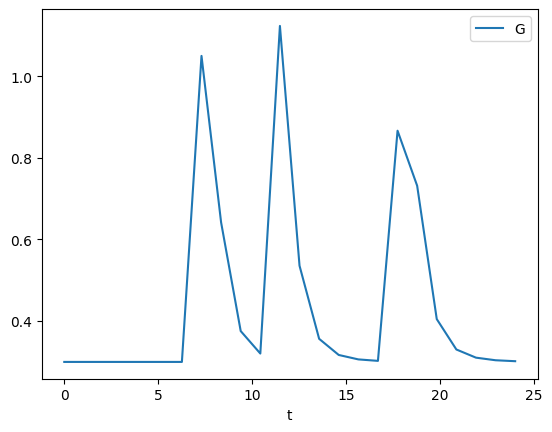

In [17]:
df.plot(x="t", y="G")

#### Endogenous currents


- **I_S** : Insulin secretion (endogenous)
- **I_E** : Effective Insulin (injected + endogenous)
- **L** : ("Light") Photoperiod conveyed via hypothalamus

<Axes: xlabel='t'>

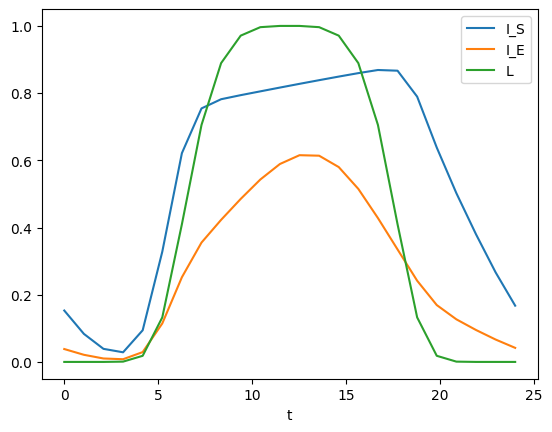

In [18]:
df.plot(x="t", y=["I_S", "I_E", "L", ])

## Visualize using pfun tools

(<Figure size 1400x1000 with 2 Axes>,
 array([<Axes: >, <Axes: >], dtype=object))

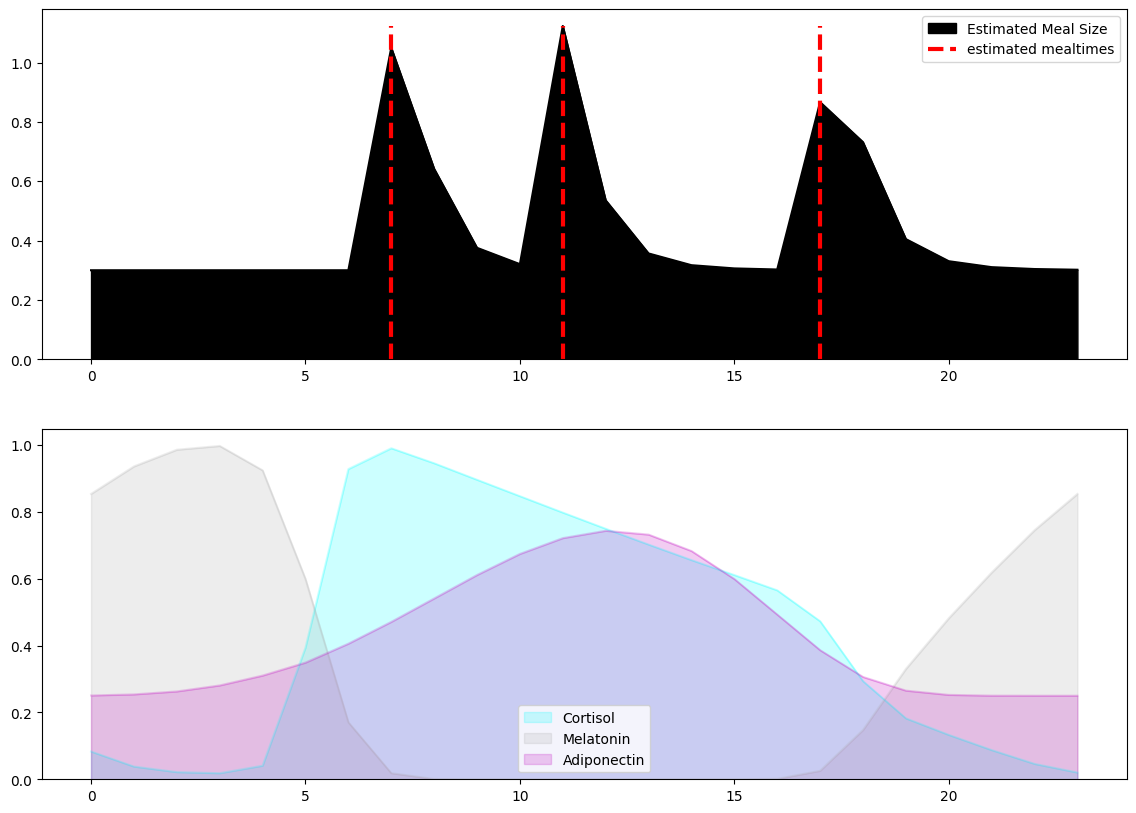

In [19]:
from pfun_cma_model.engine.cma_plot import CMAPlotConfig
import matplotlib.pyplot as plt
plt.close('all')
cma_plot = CMAPlotConfig(plot_cols=["c", "m", "a"])
df['G_soln'] = df['G']  # just to satisfy the plot function
cma_plot().plot(df, plot_cols=["c", "m", "a"], separate2subplots=False)

# Export notebook to HTML

[./visualize-generated-scenarios.html](./visualize-generated-scenarios.html)

In [20]:
%%sh

uv run jupyter nbconvert --to html visualize-generated-scenarios.ipynb --output visualize-generated-scenarios.html
cp visualize-generated-scenarios.html ../../pfun_cma_model/static/notebooks/visualize-generated-scenarios.html

[NbConvertApp] Converting notebook visualize-generated-scenarios.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 467597 bytes to visualize-generated-scenarios.html


In [1]:
%%sh

uv run jupyter nbconvert --to pdf visualize-generated-scenarios.ipynb --output visualize-generated-scenarios.pdf
cp visualize-generated-scenarios.pdf ../../pfun_cma_model/static/notebooks/visualize-generated-scenarios.pdf

[NbConvertApp] Converting notebook visualize-generated-scenarios.ipynb to pdf
[NbConvertApp] Support files will be in visualize-generated-scenarios_files/
[NbConvertApp] Making directory ./visualize-generated-scenarios_files
[NbConvertApp] Writing 39266 bytes to notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "/home/robbiec/Git/pfun-cma-model/.venv/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/home/robbiec/Git/pfun-cma-model/.venv/lib/python3.12/site-packages/jupyter_core/application.py", line 284, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/home/robbiec/Git/pfun-cma-model/.venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/robbiec/Git/pfun-cma-model/.venv/lib/python3.12/site-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/home/robbiec/Git/pfun-cma-m

CalledProcessError: Command 'b'\nuv run jupyter nbconvert --to pdf visualize-generated-scenarios.ipynb --output visualize-generated-scenarios.pdf\ncp visualize-generated-scenarios.pdf ../../pfun_cma_model/static/notebooks/visualize-generated-scenarios.pdf\n'' returned non-zero exit status 1.